In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [41]:
df = pd.read_excel('/Users/apple/Documents/Career_Prediction_Model/data/Career Dataset.xlsx')

In [42]:
df.head()

,Career,Skill
0,Software Development and Engineering,"Web Development, Mobile App Development, Artif..."
1,Development,"Web Development, Mobile App Development, Probl..."
2,Data Science,"Data Analysis and Visualization, Deeplearning,..."
3,Development,Web Development
4,Artificial Intelligence,"Deep Learning, Machine Learning, Statistics, D..."


In [43]:
summary = {
    "Shape": df.shape,
    "Column Names": df.columns.tolist(),
    "Missing Values": df.isnull().sum(),
    "Unique Careers": df['Career'].nunique(),
    "Sample Careers": df['Career'].unique()[:5]
}

summary

{'Shape': (4076, 2),
 'Column Names': ['Career', 'Skill'],
 'Missing Values': Career    0
 Skill     0
 dtype: int64,
 'Unique Careers': 6,
 'Sample Careers': array(['Software Development and Engineering', 'Development',
        'Data Science', 'Artificial Intelligence',
        'User Experience (UX) and User Interface (UI) Design'],
       dtype=object)}

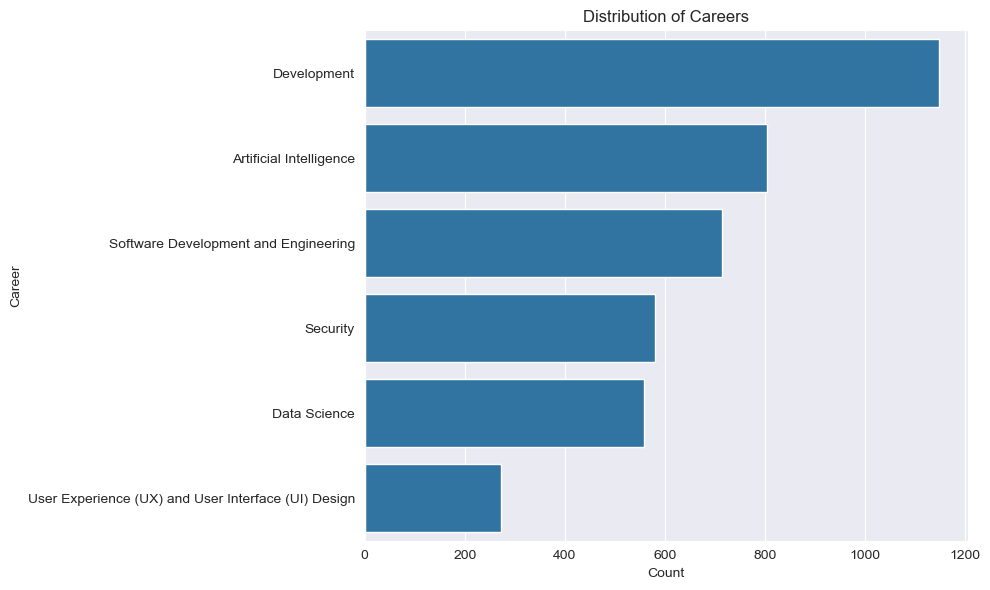

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Career', order=df['Career'].value_counts().index)
plt.title('Distribution of Careers')
plt.xlabel('Count')
plt.ylabel('Career')
plt.tight_layout()
plt.show()


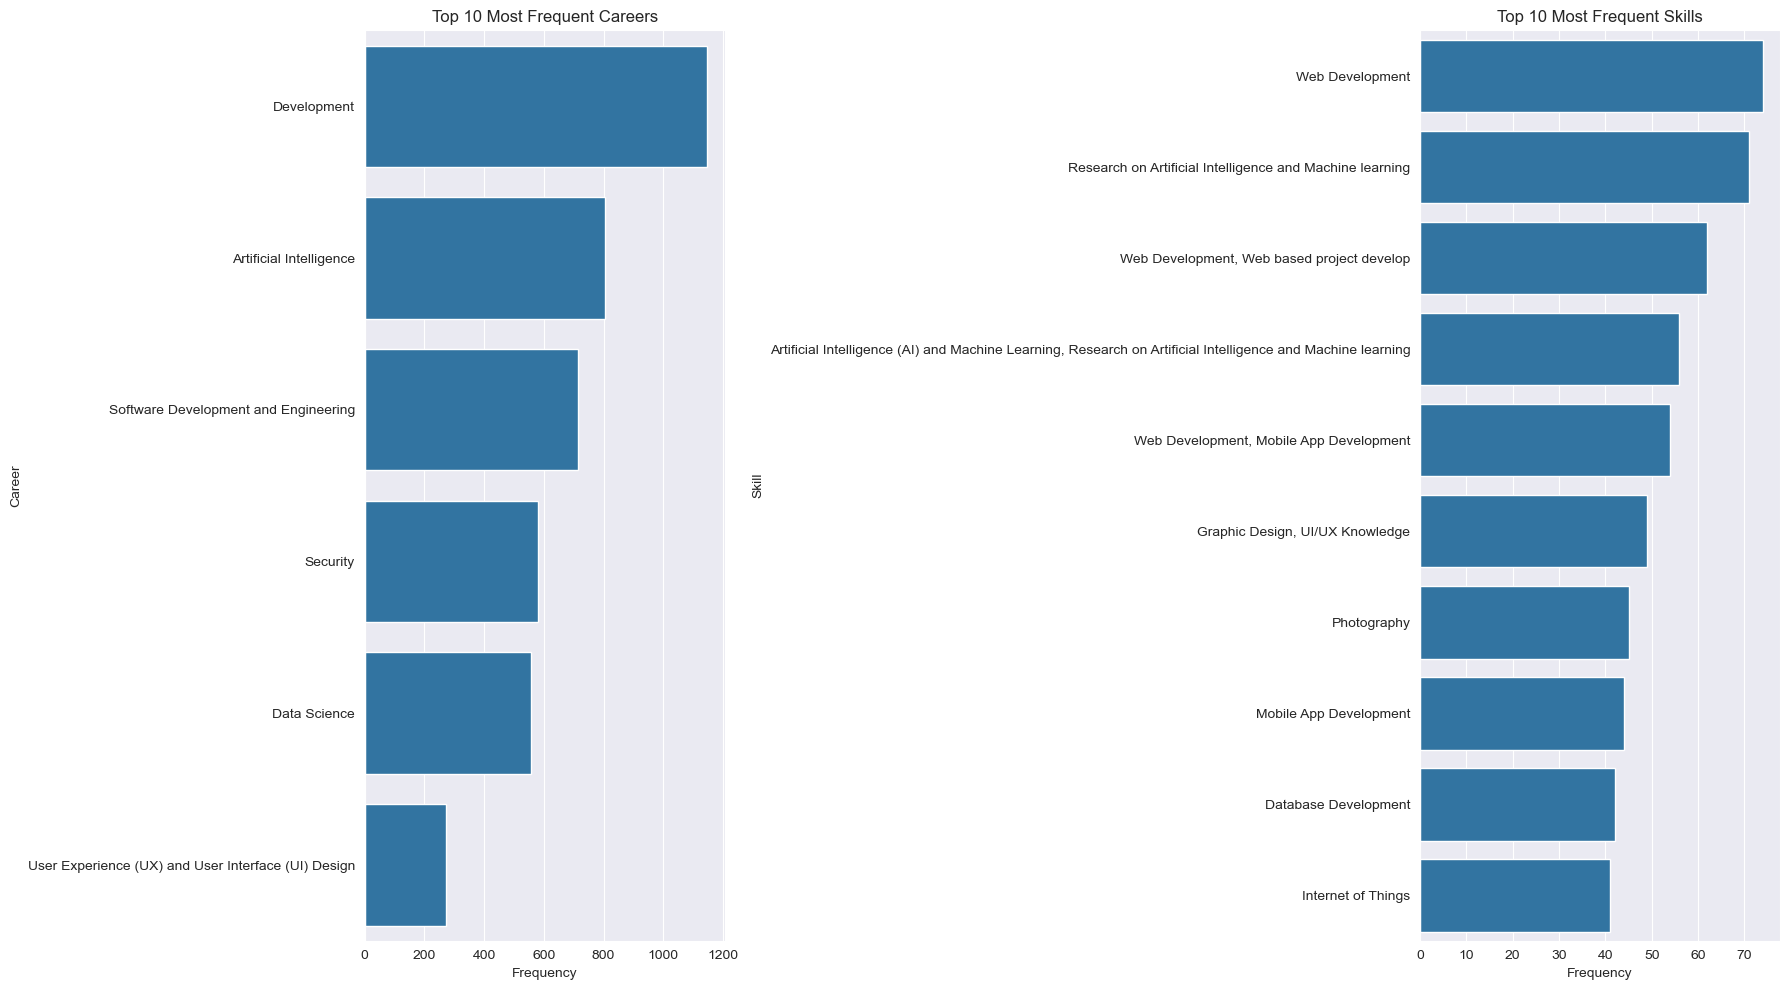

In [45]:
# Calculate the frequency of each career
career_counts = df['Career'].value_counts().reset_index()
career_counts.columns = ['Career', 'Count']

# Calculate the frequency of each skill
skill_counts = df['Skill'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# Sort the data for better visualization
career_counts = career_counts.sort_values(by='Count', ascending=False)
skill_counts = skill_counts.sort_values(by='Count', ascending=False)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot for Career Counts
sns.barplot(x='Count', y='Career', data=career_counts.head(10), ax=axes[0])
axes[0].set_title('Top 10 Most Frequent Careers')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Career')

# Plot for Skill Counts
sns.barplot(x='Count', y='Skill', data=skill_counts.head(10), ax=axes[1])
axes[1].set_title('Top 10 Most Frequent Skills')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Skill')

plt.tight_layout()
plt.show()

In [46]:

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
X = vectorizer.fit_transform(df['Skill'])

# Encode the 'Career' column
le = LabelEncoder()
y = le.fit_transform(df['Career'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=le.classes_))


Naive Bayes Results
Accuracy: 0.9007352941176471

Classification Report:
                                                      precision    recall  f1-score   support

                            Artificial Intelligence       0.90      0.93      0.91       161
                                       Data Science       0.96      0.90      0.93       122
                                        Development       0.89      0.96      0.93       233
                                           Security       0.97      0.90      0.93       106
               Software Development and Engineering       0.80      0.75      0.77       147
User Experience (UX) and User Interface (UI) Design       0.96      0.98      0.97        47

                                           accuracy                           0.90       816
                                          macro avg       0.91      0.90      0.91       816
                                       weighted avg       0.90      0.90      0.90     

In [49]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Results
Accuracy: 0.9240196078431373

Classification Report:
                                                      precision    recall  f1-score   support

                            Artificial Intelligence       0.89      0.96      0.92       161
                                       Data Science       0.98      0.97      0.97       122
                                        Development       0.89      0.97      0.93       233
                                           Security       0.97      0.93      0.95       106
               Software Development and Engineering       0.92      0.75      0.83       147
User Experience (UX) and User Interface (UI) Design       1.00      0.98      0.99        47

                                           accuracy                           0.92       816
                                          macro avg       0.94      0.93      0.93       816
                                       weighted avg       0.93      0.92      0

In [50]:
sample = ["Machine Learning, Deep Learning, Python, Statistics"]
sample_vec = vectorizer.transform(sample)
predicted_career = le.inverse_transform(lr_model.predict(sample_vec))

print("Predicted Career:", predicted_career[0])


Predicted Career: Artificial Intelligence
